In [1]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi,deg, cos, sin,atan, simplify, eye, solve, latex, atan2, pprint, init_printing, Derivative, sqrt, Eq, solve
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point
from sklearn.metrics import mean_squared_error
from scipy.integrate import cumulative_trapezoid

In [3]:
#Definir el volumen
hc = symbols("hc")
r_inicial = symbols("r_0")
diferencia_r = symbols("delta_r")
volumen_inicial = (np.pi*(r_inicial**2)*hc)
volumen_final = symbols("v_final")

cambio_tornillo = 1.25 #mm, por vuelta

#Definir la cantidad de vueltas
num_vueltas = diferencia_r*(1/cambio_tornillo)

#Hallar el delta r
ecuacion = Eq(diferencia_r**2 + diferencia_r*r_inicial + volumen_final- volumen_inicial, 0)
solucion = solve(ecuacion, diferencia_r)
print(solucion)


[-0.5*r_0 - 1.77245385090552*sqrt(hc*r_0**2 + 0.0795774715459478*r_0**2 - 0.318309886183791*v_final), -0.5*r_0 + 1.77245385090552*sqrt(hc*r_0**2 + 0.0795774715459478*r_0**2 - 0.318309886183791*v_final)]


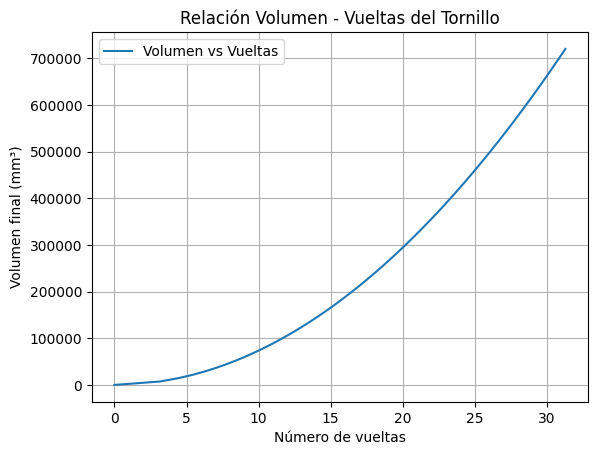

In [9]:
# Variables simbólicas
delta_r = symbols("delta_r", real=True)
r0 = 0        # Radio inicial (mm)
h = 150        # Altura del cilindro (mm)
v_inicial = 0 # Volumen inicial (mm³)
cambio_tornillo = 1.25  # mm por vuelta

# Rango de volúmenes
volumenes = np.linspace(0, 720000, 100)

vueltas = []

for v_final in volumenes:
    # Ecuación completa: π*h*(2*r0*delta_r + delta_r**2) = v_final - v_inicial
    eq = Eq(np.pi*h*(2*r0*delta_r + delta_r**2), v_final - v_inicial)
    soluciones = solve(eq, delta_r)
    
    # Filtrar solo soluciones reales y positivas
    soluciones_reales = [s.evalf() for s in soluciones if s.is_real and s.evalf() >= 0]
    
    if soluciones_reales:
        delta_r_val = min(soluciones_reales)  # Tomamos la menor positiva (normalmente la válida)
        vueltas.append(delta_r_val / cambio_tornillo)
    else:
        vueltas.append(np.nan)  # Si no hay solución real

# Graficar
plt.plot(vueltas, volumenes, label='Volumen vs Vueltas')
plt.ylabel("Volumen final (mm³)")
plt.xlabel("Número de vueltas")
plt.title("Relación Volumen - Vueltas del Tornillo")
plt.grid(True)
plt.legend()
plt.show()